In [1]:
import sympy as sym
sym.init_printing()

In [2]:
import random
import numpy as np

In [3]:
from sympy import oo

In [4]:
import math

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
r, t, k, i = sym.symbols('r, t, k, i', nonnegative=True)

Math checks for me
------------------

In [7]:
rhs = (r - 1) ** 2
lhs = (1 - r) ** 2

In [8]:
rhs.expand() == lhs.expand()

True

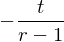

In [9]:
((1 - r) * t / (r - 1) ** 2).simplify()

In [10]:
((r * t - 1) ** 2).expand()

First formulation (without t)
-------------------


In [11]:
selective = 1 / (1 - r)

In [12]:
indiscriminate = ((1 - r) * sym.summation(i * r ** (i - 1), (i, 1, k)))

In [13]:
last_turn = (k + 1) * r ** k

In [14]:
indiscriminate += last_turn

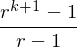

In [15]:
indiscriminate.simplify()

It can be seen that indiscriminate cost is always less with this formulation.

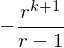

In [16]:
(selective - indiscriminate.simplify()).simplify() 

Because $\frac{r^{k + 1}}{1 - r}$ is always positive and non negative.

Selective (with t)
---------

For selective the model is simple. At each time step there is a $(1 - r)$ probability to get a rhino. If a selective gets a rhino then they need $t$ time to take the horn.

Thus $T_s = (1 - r) t + r (1 - r) (1 + t) + r ^ 2 (1- r)(2 + t) \dots$

which can be written as:

$$(1 - r) \sum_{i=0} ^ {\infty} r ^ i (i + t)$$

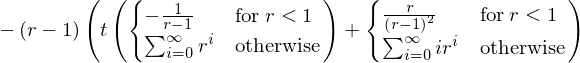

In [17]:
selective_risk = (1 - r) * sym.summation(r ** (i) * (i + t), (i, 0, oo))
selective_risk.simplify()

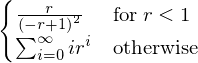

In [18]:
sym.summation(i * r ** (i), (i, 0, oo))

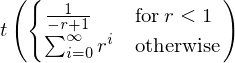

In [19]:
sym.summation(t * r ** (i), (i, 0, oo))

## Because $|r| < 1$:

$$T_s = \frac{r + t(1 - r)}{(1 - r)}$$

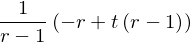

In [20]:
exprs = - (r - 1) * ((r / (- r + 1) ** 2) + t * (1  / (-r + 1)))
exprs.simplify()

In [21]:
def selective_risk(r_val, t_val):
    return (r_val + t_val * (1 - r_val)) / (1 - r_val)

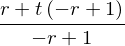

In [22]:
selective_risk(r, t)

In [23]:
(selective_risk(r, t) - exprs).factor()

**Behaviour of risk depending on $r$**

In [24]:
rs = np.linspace(0, 0.99, 100)
t_val = 1
ys = [selective_risk(r_val, t_val) for r_val in rs]

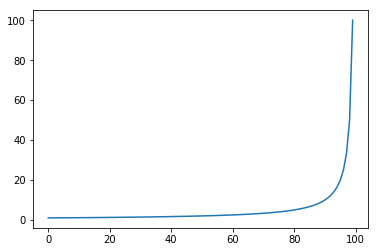

In [25]:
plt.plot(ys);

**Behaviour of risk for $t= 1$**

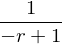

In [100]:
selective_risk(r, t_val=1)

In [27]:
def simulate_number_of_dehorned_rhinos(r_val, seed):
    count = 0
    np.random.seed(seed)
    while np.random.random() < r_val:
        count += 1
    return count

**Simulation of selective risk**

In [28]:
def selective_risk_simulation(r_val, t_val, seed):
    return simulate_number_of_dehorned_rhinos(r_val, seed) + t_val

In [29]:
timesteps = range(10000)
ys = []
for timestep in timesteps:
    ys.append(selective_risk_simulation(0.60, 0.5, seed=timestep))

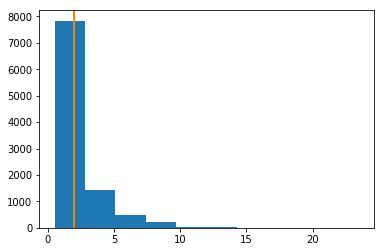

In [30]:
plt.hist(ys);
plt.axvline(np.mean(ys), color='red');
plt.axvline(selective_risk(0.6, 0.5), color='orange');

Indiscriminate (with t)
-----------------------

$T_I = t (1 - r) + 2rt (1 - r) + 3r^{2}t(1 - r)+ \dots + (\frac{1}{\theta_r} - 1)r ^ {\frac{1}{\theta_r} - 2} + \frac{1}{\theta_r} r ^ {\frac{1}{\theta_r} - 1}$

which can be writen as:
    
$$T_I = t (1 - r) \sum_{i=1}^{N_r - 1} i r ^{i - 1} + N_r t r ^ {(N_r - 1)}$$ 

where $$N_r = \frac{1}{\theta_r}$$

In [31]:
N_r = sym.symbols('N_r')
theta_r = sym.symbols(r'\theta_r')

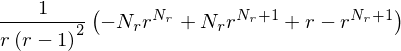

In [32]:
sym.summation(i * r ** (i - 1), (i, 1, N_r - 1)).simplify()

In [33]:
force_exist = N_r * r ** (N_r - 1) * t
force_exist

In [34]:
indiscriminate = (t * (1 - r) * sym.summation(i * r ** (i - 1), (i, 1, N_r - 1)))

In [35]:
indiscriminate += force_exist 

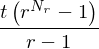

In [52]:
indiscriminate.simplify()

In [53]:
def expression(r_val, t_val, theta_r_val):
    N_r_val = 1 / theta_r_val
    return t_val * (r_val ** N_r_val - 1) /  ((r_val - 1))

In [56]:
(expression(r, t, theta_r) -  indiscriminate.subs({N_r: 1/ theta_r})).factor()

In [57]:
def indiscriminate_risk(r_val, t_val, theta_r_val):
    N_r_val = math.ceil(1 / theta_r_val)
    return t_val * (r_val ** N_r_val - 1) /  ((r_val - 1))

**Behaviour of risk depending on $r$**

In [58]:
rs = np.linspace(0.001, 0.99, 100)
t_val = 1
ys = [indiscriminate_risk(r_val, t_val, 0.3) for r_val in rs]

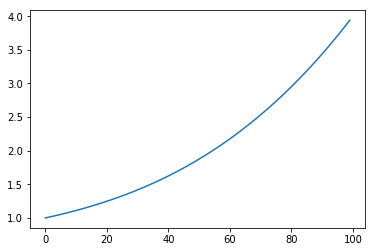

In [59]:
plt.plot(ys);

**Simulate**

In [85]:
def indiscriminate_risk_simulation(r_val, t_val, theta_r, seed):
    count = simulate_number_of_dehorned_rhinos(r_val, seed)
    return min(math.ceil(1 / theta_r), count + 1) * t_val

In [86]:
timesteps = range(10000)
ys = []
for timestep in timesteps:
    ys.append(indiscriminate_risk_simulation(0.6, 0.5, 0.1, timestep))

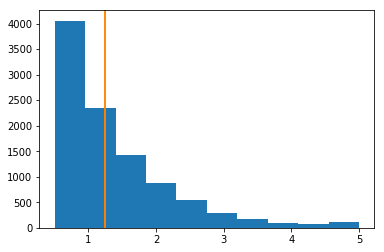

In [87]:
plt.hist(ys);
plt.axvline(np.mean(ys), color='red');
plt.axvline(indiscriminate_risk(0.6, 0.5, 0.1), color='orange');

# Comparison

**Example 1**

In [88]:
import itertools

In [92]:
r_vals = np.linspace(0.001, 0.999, 5)
t_vals = np.linspace(0, 1, 5)
theta_r_vals = np.linspace(0.001, 0.99, 10)
timesteps = range(10000)

In [93]:
parameters = list(itertools.product(r_vals, t_vals, theta_r_vals))
parameters[0]

In [101]:
for r_val, t_val_, theta_r_val in parameters:
    selective_ys = [selective_risk_simulation(r_val, t_val, i) for i in timesteps]
    indiscriminate_ys = [indiscriminate_risk_simulation(r_val, t_val, theta_r_val, i) for i in timesteps]
    plt.figure()
    plt.title(r'$r=${}, $t=${}, $\theta_r=${}'.format(r_val, t_val_, theta_r_val))
    plt.hist(selective_ys, alpha=0.4, color='red')
    plt.axvline(selective_risk(r_val, t_val), color='red');
    plt.hist(indiscriminate_ys, alpha=0.4, color='darkgreen');
    plt.axvline(indiscriminate_risk(r_val, t_val, theta_r_val), color='darkgreen');
    plt.savefig('images/{}-{}-{}.pdf'.format(r_val, t_val_, theta_r_val))
    plt.close();